<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Machine-Learning/blob/master/Homework11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Understanding Deconvolution in Autoencoders**
---------------

In class, we worked with autoencoders built from multilayer perceptrons (MLPs). However, encoders are often constructed using convolutional architectures to better capture spatial patterns. In this assignment, you'll explore how the decoder can use deconvolutional (transposed convolution) layers to reverse and mirror the operations performed by the convolutional encoder.

While convolutional encoders are relatively well understood, **decoding (or upsampling) the compressed representation** using **deconvolutional layers** (also known as **transposed convolutions**) often raises questions.

This assignment is particularly relevant because deconvolution is a core component of the U-Net architecture, a prominent neural network used extensively in image segmentation tasks.

Your main objective is to deeply understand **how transposed convolution layers work**, and explain them in both words and visuals.


## **The Objective**

Understand and clearly explain how **transposed convolutions** work. Use 2D transposed convolutions and a small grid of 2D points as a working example.

You may need to do some additional reading to complete this assignment.

## **Tasks & Deliverables**

### 1. **Theory Exploration**

Using markdown cells in your Colab notebook, answer the following:

- What is a **transposed convolution**?
- How does it differ from a regular convolution?
- How does it upsample feature maps?
- What are **stride**, **padding**, and **kernel size**, and how do they influence the result in a transposed convolution?
- To earn full two points, your explanation must be detailed enough for a reader to reproduce the upsampling process step by step.


### 2. **Manual Diagram (by your hand, not a generated image)**

Carefully plan and draw **by hand** a diagram or a set of diagrams that:

- Explain the process of using **transposed convolution**.
- Use an example of a **small input grid of 2D points** which gets expanded into a larger output grid.
- Explain how stride, padding, and the kernel shape affect the result.
- Show intermediate steps of the operation, not just input and output.

**Scan or photograph your diagram(s)**, and upload it to your **GitHub repository** for this course.

Then embed it in your Colab notebook using markdown (you can find examples on *how to do it* in previous notebooks related to this class, e.g. the one on linear regression or the one on the MLP network).


### 3. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.


# **Theory Exploration**

**What is a transposed convolution?**
 **&**
**How does it differ from a regular convolution?**

  "Transponowana konwolucja" to operacja, która zwiększa rozmiar otrzymanej mapy cech (nie wiem czy mapa cech to odpowiednie określenie po polsku, ang. *featurre map*), tzn. generuje output większy niż otrzymany wcześniej input (np. na podstawie mapy 2x2 tworzy mapę 4x4). "Transponowana konwolucja" intuicyjnie działą jak konwolucja tylko odwrotnie - zamiast  zmniejszać obraz, powiększa go używając filtra (*kernel*). Warto w tym miejscu wspomnieć, w jaki sposób kontrolujemy jak bardzo *output* będzie większy niż *input* i generalnie, jakie parametry musimy ustawić przed rozpoczęcziem tej procedury. Wpływają na to parametry: *stride*, *padding*, *size of kernel*.

**How does it upsample feature maps?**

  Aby wyjaśnić jak to działa, pokażemy ten proces w krokach. Najpierw musimy jednak założyć wartości parametrów. Niech:

  *stride* $=2$

  *kernel* $=$
    
    [0,  1, 0]
    [1, -4, 1]
    [0,  1, 0]

  *padding* $=1$


  **Krok 1. Zastosowanie stride**

  Załóżmy, że mamy *input* postaci:

    [1, 2]
    [3, 4]

  Teraz pomiędzy oryginalne liczby wstawiamy zera. Liczbę tych zer definiuje nam *stride*. Dla *stride* $= n$ wstawiamy $n-1$ zer pomiędzy liczby. W naszym przypadku *stride* $=2$, zatem pomiędzy liczby wstawiamy po jednym zerze. Otrzymujemy wtedy macierz (nazwijmy ją macierzą $A$):
  
    [1, 0, 2]
    [0, 0, 0]
    [3, 0, 4]
  
  **Krok 2. Zastosowanie kernela**

  Najpierw wygenerujemy pustą macierz, która będzie rozmiary $n$ x $n$, gdzie $n = stride (input\ size - 1) + kernel\ size$. Zatem $n = 2(2-1)+3=5$.
  W rezultacie generujemy macierz:

    [0, 0, 0, 0, 0]
    [0, 0, 0, 0, 0]
    [0, 0, 0, 0, 0]
    [0, 0, 0, 0, 0]
    [0, 0, 0, 0, 0]

  Przypomnijmy, że kernel ma rozmiar 3x3 i jest postaci:

    [0,  1, 0]
    [1, -4, 1]
    [0,  1, 0]
  
  Teraz musimy nałożyć kernel na obraz otrzymany po zastosowaniu *stride*. Rozważmy każdą z pozycji w macierzy $A$:

**Pozycja (0,0)**

  $A[0,0] = 1$, zatem mnożymy *kernel* przez 1. Dostajemy:

    [0,  1, 0]
    [1, -4, 1]
    [0,  1, 0]

Otrzymane powyżej wartości dodajemy do wygenerowanej siatki 5 x 5 do pozycji (0,0). Wtedy mamy:

    [0, 1, 0, 0, 0]
    [1, -4, 1, 0, 0]
    [0, 1, 0, 0, 0]
    [0, 0, 0, 0, 0]
    [0, 0, 0, 0, 0]

Analogiczną procedurę powtarzamy dla każdej pozycji macierzy $A$. Pomijamy pozycje (0,1), (1,0), (1,1), (1,2), (2,1), gdyż są one równe zero, a zatem nie wpłyną na wynik.


**Pozycja (0,2)**

  $A[0,2] = 2$, zatem mnożymy *kernel* przez 2. Dostajemy:

    [0,  2, 0]
    [2, -8, 2]
    [0,  2, 0]

Otrzymane powyżej wartości dodajemy do wygenerowanej siatki 5 x 5 do pozycji (0,2). Wtedy mamy:

    [0,  1, 0,  2, 0]
    [1, -4, 3, -8, 2]
    [0,  1, 0,  2, 0]
    [0,  0, 0,  0, 0]
    [0,  0, 0,  0, 0]

**Pozycja (2,0)**

  $A[2,0] = 3$, zatem mnożymy *kernel* przez 3. Dostajemy:

    [0,   3, 0]
    [3, -12, 3]
    [0,   3, 0]

Otrzymane powyżej wartości dodajemy do wygenerowanej siatki 5 x 5 do pozycji (2,0). Wtedy mamy:

    [0,   1, 0,  2, 0]
    [1,  -4, 3, -8, 2]
    [0,   4, 0,  2, 0]
    [3, -12, 3,  0, 0]
    [0,   3, 0,  0, 0]


**Pozycja (2,2)**

  $A[2,2] = 4$, zatem mnożymy *kernel* przez 4. Dostajemy:

    [0,   4, 0]
    [4, -16, 4]
    [0,   4, 0]

Otrzymane powyżej wartości dodajemy do wygenerowanej siatki 5 x 5 do pozycji (2,2). Wtedy mamy:

    [0,   1, 0,   2, 0]
    [1,  -4, 3,  -8, 2]
    [0,   4, 0,   6, 0]
    [3, -12, 7, -16, 4]
    [0,   3, 0,   4, 0]

Zatem otrzymaliśmy finalnie powyższą macierz.

  **Krok 3. Zastosowanie paddingu**

  W "transponowanej konwolucji" *padding* odpowiada za obcinanie ramko obrazu. Założyliśmy *padding* równy $1$, zatem z otrzymanej powyżej macierzy musumy usunąć jeden wiersz/kolumnę z każdej strony. W wyniku tego otrzymujemy:

    [ -4, 3   -8]
    [  4, 0,   6]
    [-12, 7, -16]

  co jest ostatecznym wynikiem.

  Powyższa procedura pokazuje jak przerowadzić "transponowaną konwolucję" z ustalonymi parametrami.


  **What are stride, padding, and kernel size, and how do they influence the result in a transposed convolution?**

  Poprzedni punkt już pokazał dosyć dokładnie w jaki sposób parametry wpływają na *output*. Posumowując:

  *Stride* powoduje dodanie zer pomiędzy pikselami (im większy tym więcej zer). Większy *stride* sprawia, że *output* będzie większy oraz powoduje, iż rozdzielczość obrazu wyjściowego będzie większa, jednak należy pamiętać, że zbyt duża wartość tego parametru może doprowadzić do występowania "dziur"albo tzw. "artefaktów".

  *Kernel size* reprezentuje rozmiar macierzy będącej filtrem transformującym obraz wejściowy. Im większy będzie *kernel*, tym szerszy zasięg będzie miał pojedynczy piksel na cały obraz. Co więcej, większy filtr może prowadzić do gładszych/stopniowych obrazów wyjściowych.

  *Padding* odpowiada za przycinanie otrzymanego obrazu po prekształceniu obrazu za pomocą filtra. *Padding* $= 0$ nie wpływa kompletnie na obraz, a *padding* $>0$ mówi, jak bardzo przyciąć krawędzie obrazu.

  Wielkość *outputu* opisuje wzór:

  $stride (input\ size - 1) + kernel\ size - 2 padding$

# Manual diagram

Przeprowadzimy tutaj analogiczną procedurę jak w porpzedniej sekcji. Będzie miała ona na celu zwizualizować jak działa "transponowana konwolucja". Tym razem skorzystamy z innego zestawu danych początkowych.


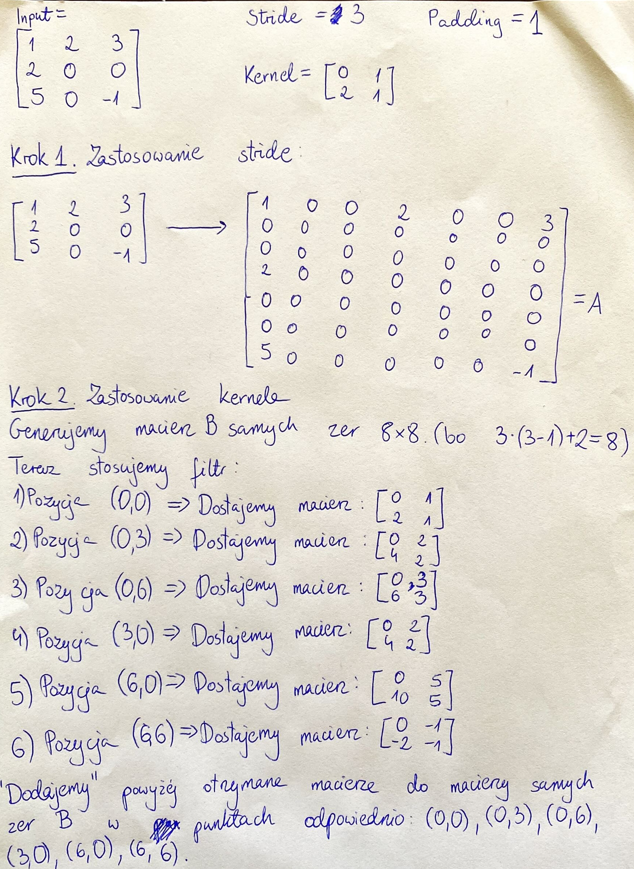



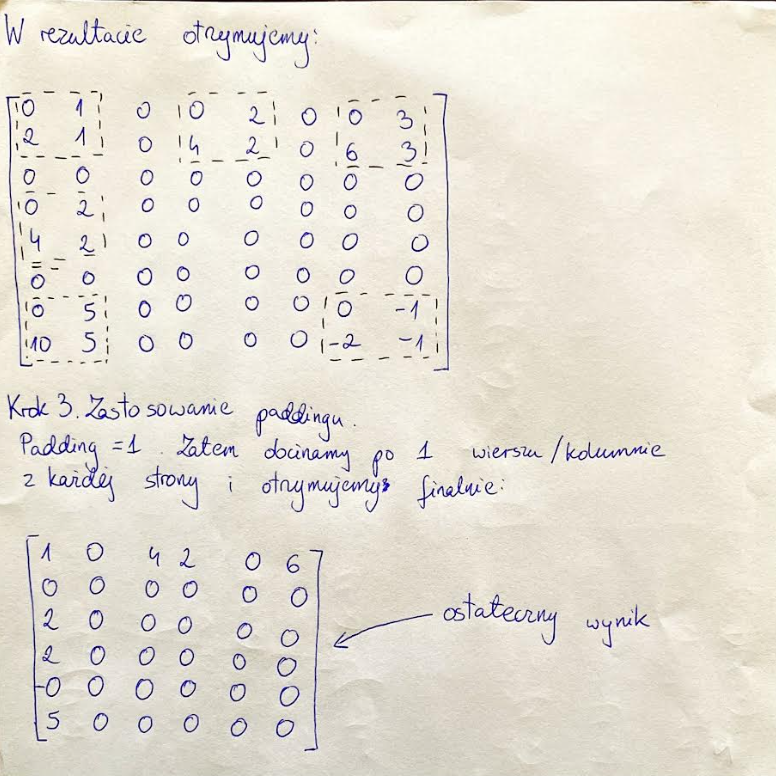

Powyższy przykład pokazuje jak złe dobranie parametrów może wpłynąć na wynik. Skorzystaliśmy z stosunkowo dużego *stride* w stosunku do rozmiarów obrazka wejściowego i rozmiaru filtra. W związku z tym (i z faktem, że w centrum *inputu* znajdowały się 3 zera) macierz otrzymana po zastosowaniu *kernela* składała się głównie z zer. Sytuację pogorszył jeszcze *padding*, który wyciął sporą liczbę wartości różnych od zera zmacierzy. Doporowadziło to do sytuacji, gdzie *output* składa się głównie z zer i powstała w nim spora dziura (wyłącznie pierwszy wiersz i kolumna składają się z wartości niezerowych) - doszło do zdegenerowania obrazu.
Dlatego istotne jest dopasowanie odpowiednich parametrów.